In [1]:
import pandas as pd
from siuba import *
import numpy as np

In [2]:
df = pd.read_csv("base_dados/SAEB_IDEB_ESCOLAS_5o_9o_2019_cactus.csv")

In [3]:
df = df[df.Rede == "Municipal"]

In [4]:
cactus19 = df[df["cactus"] == "cactus19"]
n_cactus = df[df["cactus"] == "não cactus"]

In [5]:
delta_mat = (cactus19 >>
    group_by(_.ano) >>
    summarize(media_MT = _.MT_9o.mean()))
delta_mat_IDEB = (cactus19 >>
    group_by(_.ano) >>
    summarize(IDEB_9o = _.IDEB_9o.mean()))


In [6]:
delta_mat["log"] = np.log2(delta_mat['media_MT']) 
delta_mat_IDEB["log"] = np.log2(delta_mat_IDEB['IDEB_9o'])

In [7]:
delta_mat['delta'] = delta_mat['log'].diff() * 100

delta_mat_IDEB['delta'] = delta_mat_IDEB['log'].diff() * 100


In [8]:
delta_mat['porcentagem %']  = (delta_mat['media_MT'].pct_change()) * 100
delta_mat_IDEB['porcentagem %']  = (delta_mat_IDEB['IDEB_9o'].pct_change()) * 100

In [9]:
delta_mat_IDEB.style.set_caption("Hello World")
delta_mat_IDEB

,ano,IDEB_9o,log,delta,porcentagem %
0,2005,3.100000,1.632268,NaN,NaN
1,2007,3.312500,1.727920,9.565224,6.854839
2,2009,3.682857,1.880825,15.290498,11.180593
3,2011,4.144444,2.051179,17.035329,12.533402
4,2013,4.343478,2.118851,6.767209,4.802425
5,2015,5.060000,2.339137,22.028657,16.496496
6,2017,5.495122,2.458151,11.901411,8.599248
7,2019,5.923256,2.566390,10.823890,7.791162


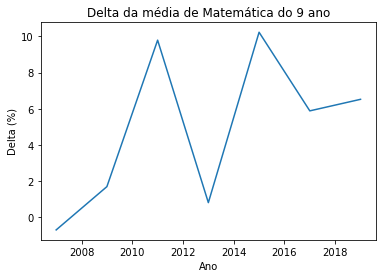

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(delta_mat.ano, delta_mat.delta)
plt.xlabel("Ano")
plt.ylabel("Delta (%)")
plt.title("Delta da média de Matemática do 9 ano")
plt.show()

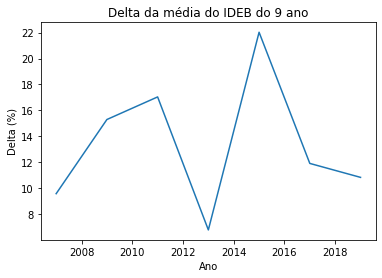

In [91]:
plt.plot(delta_mat_IDEB.ano, delta_mat_IDEB.delta)
plt.xlabel("Ano")
plt.ylabel("Delta (%)")
plt.title("Delta da média do IDEB do 9 ano")
plt.show()

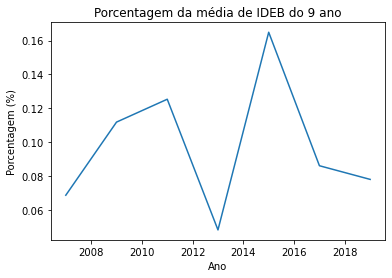

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(delta_mat_IDEB.ano, delta_mat_IDEB['porcentagem %'] )
plt.xlabel("Ano")
plt.ylabel("Porcentagem (%)")
plt.title("Porcentagem da média de IDEB do 9 ano")
plt.show()

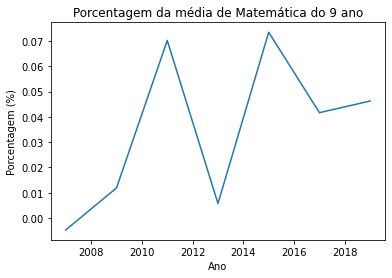

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(delta_mat.ano, delta_mat['porcentagem %'] )
plt.xlabel("Ano")
plt.ylabel("Porcentagem (%)")
plt.title("Porcentagem da média de Matemática do 9 ano")
plt.show()